# Arabica Coffee scoring categories best model from stepwise - determine Cupper.Points through Machine Learning 

## Import Packages 

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Import Dataset

In [2]:
coffee3 = pd.read_csv("./coffee3.csv")

In [3]:
list(coffee3)

['Country.of.Origin',
 'Region.Name',
 'Processing.Method',
 'Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Clean.Cup',
 'Sweetness',
 'Cupper.Points',
 'Total.Cup.Points',
 'altitude_mean_meters']

## Data Wrangling - subset X variables & Y variables in own arrays
### x variable based on best stepwise model ran in R

In [4]:
x = coffee3[['Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Clean.Cup']]

In [5]:
y = coffee3[['Cupper.Points']]

## Train Test Split Data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=13)

In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(598, 6) (598, 1)
(400, 6) (400, 1)


### 598 train rows to 400 test rows

## Run Linear Regression

In [8]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

## Examine Predictions

In [9]:
predictions = lm.predict(x_test)
predictions

array([[7.62046289],
       [7.27622386],
       [7.48948023],
       [7.07898836],
       [7.21764201],
       [7.34146151],
       [7.22002379],
       [6.83338056],
       [6.96606397],
       [7.29013048],
       [7.46627485],
       [7.62810946],
       [7.40642963],
       [7.50364175],
       [7.42488881],
       [6.97107643],
       [7.76893817],
       [7.35009456],
       [7.53342952],
       [6.42886305],
       [7.20538712],
       [6.9470672 ],
       [6.8553559 ],
       [7.59589167],
       [7.18857943],
       [7.84157045],
       [6.32511772],
       [6.99725212],
       [7.36305989],
       [7.86206531],
       [6.84442872],
       [7.7123128 ],
       [7.43317524],
       [7.39237688],
       [7.4361274 ],
       [7.64597261],
       [7.36455412],
       [7.81462564],
       [6.71293257],
       [7.33352043],
       [7.67521697],
       [7.06422734],
       [7.44657305],
       [7.51247769],
       [7.44864383],
       [7.48738899],
       [7.67268642],
       [7.634

## Plot predictions to see how best fit the model is

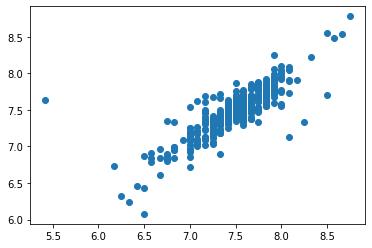

In [10]:
plt.scatter(y_test, predictions)

### Scatter plot shows a pretty straignt line

## Accuracy Score

In [11]:
print("Score:", lm.score(x_test, y_test))

Score: 0.7013185705247282


### This model is accuarate 70% of the time

## Mean Absolute Error

In [12]:
metrics.mean_absolute_error(y_test, predictions)

0.12778220634993265

### At .12, MAE is really good being close to zero

## Mean Square Error

In [13]:
metrics.mean_squared_error(y_test, predictions)

0.042664106395206326

### Because MAE was so low and less than 1, MSE is even closer to zero

## Root Mean Squared Error

In [14]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.2065529142743

### RMSE still really good at close to zero

# ******************************************************************************************************************************

## k-Fold Cross Validation

## Create folds

In [15]:
kfold = KFold(8, shuffle = True, random_state = 13)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  47  48  49  50  53  54  55  56  57  59
  60  61  62  64  65  66  67  68  69  71  72  73  74  75  76  79  80  81
  82  83  84  86  87  88  89  90  91  92  93  94  95  96  97 100 101 102
 103 104 105 106 107 109 110 111 112 113 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 186 187 188 190 191 193 194 195 197 198
 199 200 201 202 203 204 205 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 223 225 226 227 228 229 230 231 232 234 235 236 237 238
 239 240 241 242 243 244 245 247 248 249 250 252 253 254 255 256 257 258
 259 260 262 263 266 267 268 270 271 272 273

In [16]:
print(cross_val_score(lm, x,y, cv=8))

[ 0.41806587 -0.26780514 -0.37417679 -0.01610272 -0.16382697 -0.37803905
  0.09568219  0.6051661 ]


In [17]:
np.mean(cross_val_score(lm, x,y, cv=8))

-0.010129564104566002

In [18]:
np.mean(coffee3['Cupper.Points'])

7.471533066132265

## Linear Machine Learning Model can predict Cupper.Points within .01 with 8 folds.